# Bank Marketing Data Analysis

#### Imports

In [152]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report, roc_curve, auc)

# Handling class imbalance
from imblearn.over_sampling import SMOTE

# Model interpretation
import shap

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [153]:
# Load the data
df = pd.read_csv('bank-additional-full.csv', sep=';')  # Adjust separator if needed
df_copy = df.copy()
# Display the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [154]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Data types and non-null counts
df.info()


Dataset contains 41188 rows and 21 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null 

In [155]:
# Statistical summary for numerical features
df.describe()

# Statistical summary for categorical features
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [156]:
# Statistical summary for numerical features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


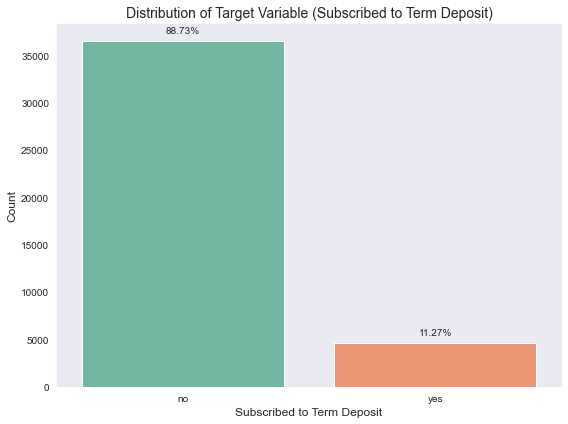

In [157]:
# Calculate the percentage of each class
class_counts = df['y'].value_counts()
class_percentages = (class_counts / len(df)) * 100

# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='y', data=df, palette='Set2')

# Add labels to the bars
for p, percentage in zip(ax.patches, class_percentages):
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add titles and labels
plt.title('Distribution of Target Variable (Subscribed to Term Deposit)', fontsize=14)
plt.xlabel('Subscribed to Term Deposit', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Data Cleaning

In [158]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
print("Missing values in each column:\n", missing)


Missing values in each column:
 Series([], dtype: int64)


As we can see there are no missing values in the dataset

In [159]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 12
Duplicates removed.


In [160]:
# Convert appropriate columns to categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Example: Convert to category dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


We're separating out the categorical columns so that we can encode them later

## EDA

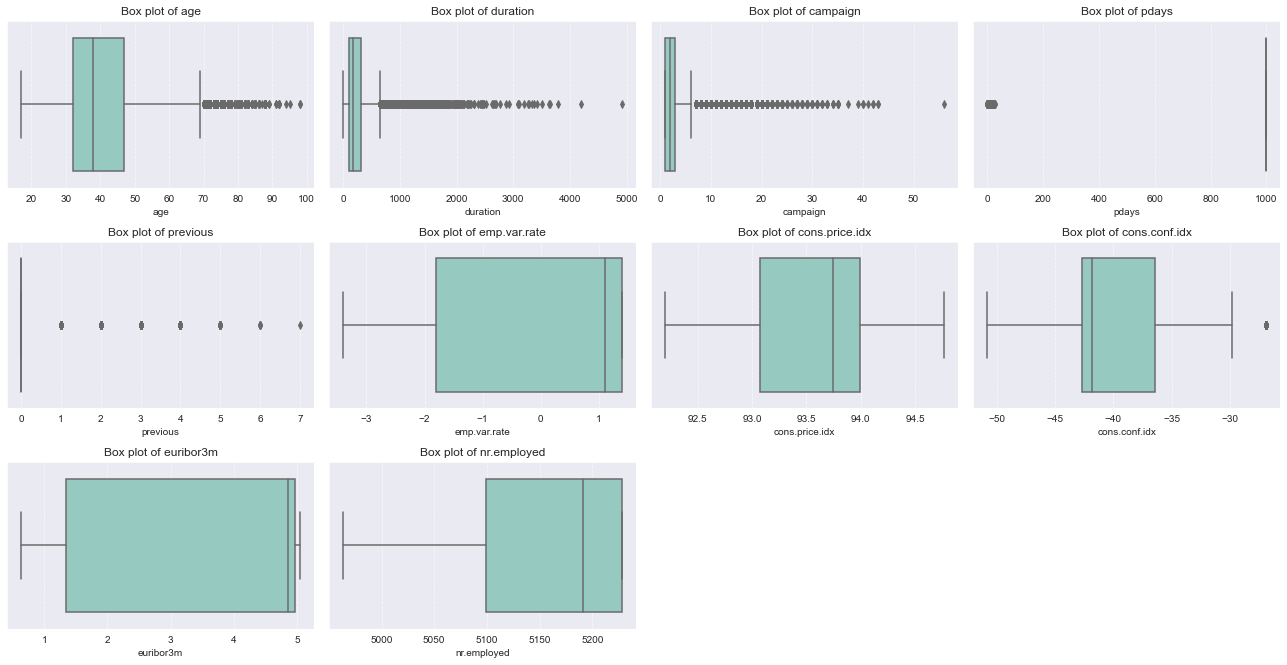

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up the figure size based on the number of columns
plt.figure(figsize=(18, 12))

# Loop through the numerical columns and plot box plots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col], palette='Set3', color='skyblue')
    
    # Add grid lines for easier interpretation
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Set the title for each subplot
    plt.title(f'Box plot of {col}', fontsize=12)

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




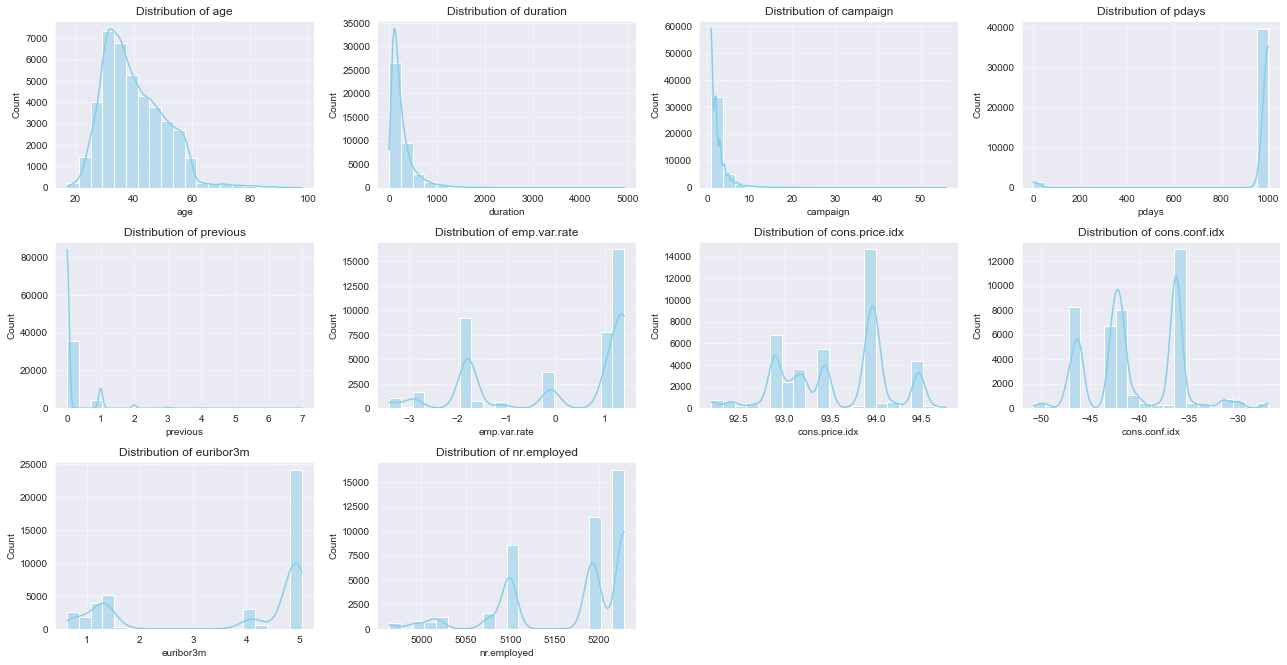

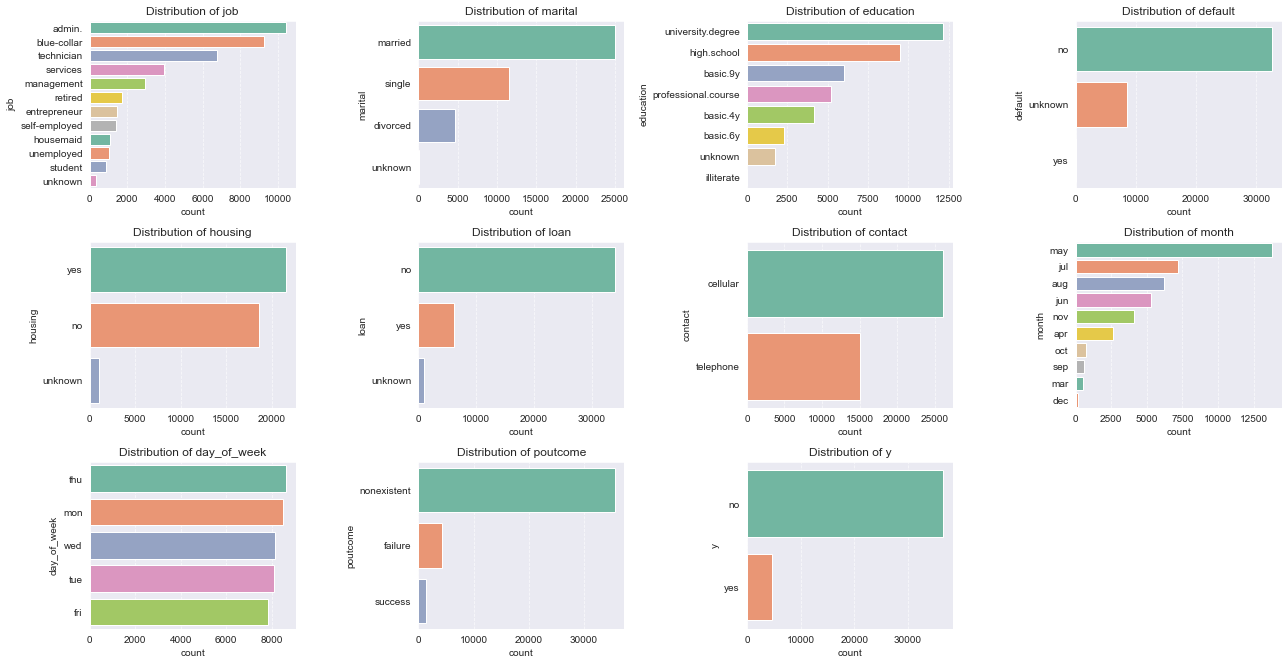

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot for numerical columns
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    
    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set the title for each subplot
    plt.title(f'Distribution of {col}', fontsize=12)
    
    # Label the x-axis for clarity
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

# Plot for categorical columns
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df[col], palette='Set2', order=df[col].value_counts().index)
    
    # Add grid lines for better readability
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Set the title for each subplot
    plt.title(f'Distribution of {col}', fontsize=12)
    
    # Label the y-axis for clarity
    plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


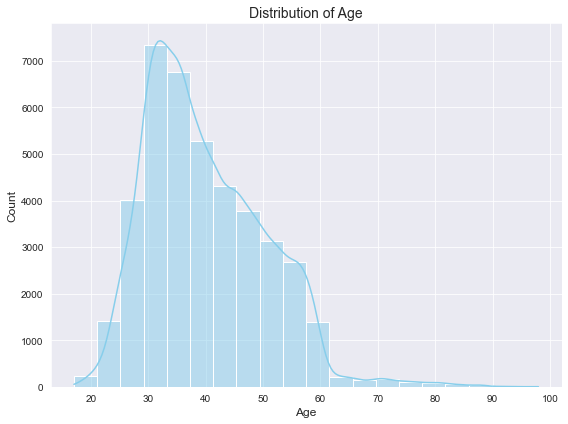

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for numerical column: Example for 'age'
sns.set_style('darkgrid')  # Set theme
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


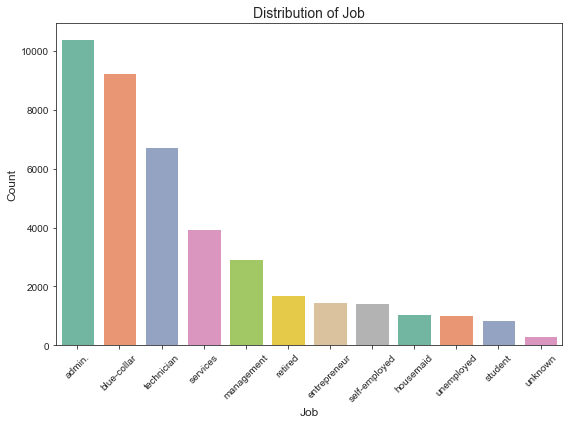

In [164]:
sns.set_style('ticks')  # Another theme for categorical data
plt.figure(figsize=(8, 6))
sns.countplot(x=df['job'], palette='Set2', order=df['job'].value_counts().index)
plt.title('Distribution of Job', fontsize=14)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.tight_layout()
plt.show()


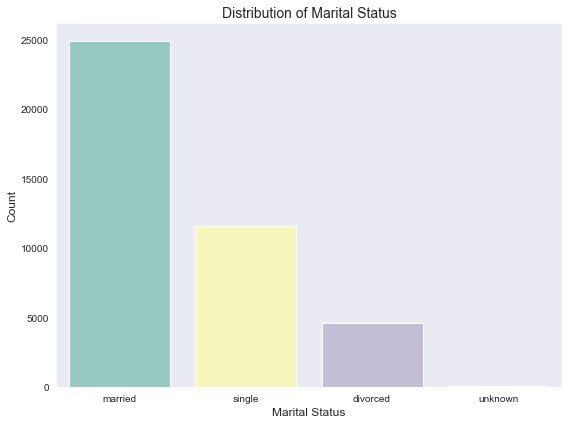

In [165]:
sns.set_style('dark')  # Different theme
plt.figure(figsize=(8, 6))
sns.countplot(x=df['marital'], palette='Set3', order=df['marital'].value_counts().index)
plt.title('Distribution of Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


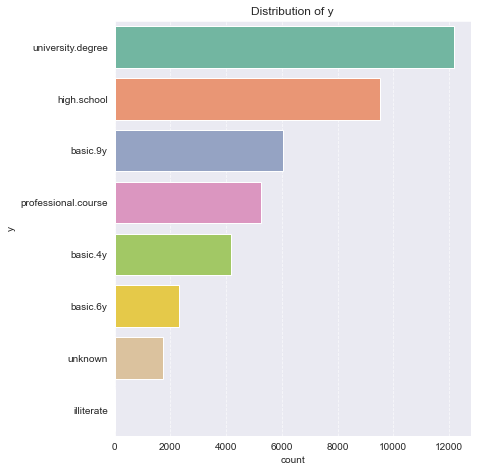

In [166]:
# Plot for categorical columns
plt.figure(figsize=(25, 25))

plt.subplot(4, 4, i)
sns.countplot(y=df['education'], palette='Set2', order=df['education'].value_counts().index)

# Add grid lines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Set the title for each subplot
plt.title(f'Distribution of {col}', fontsize=12)

# Label the y-axis for clarity
plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

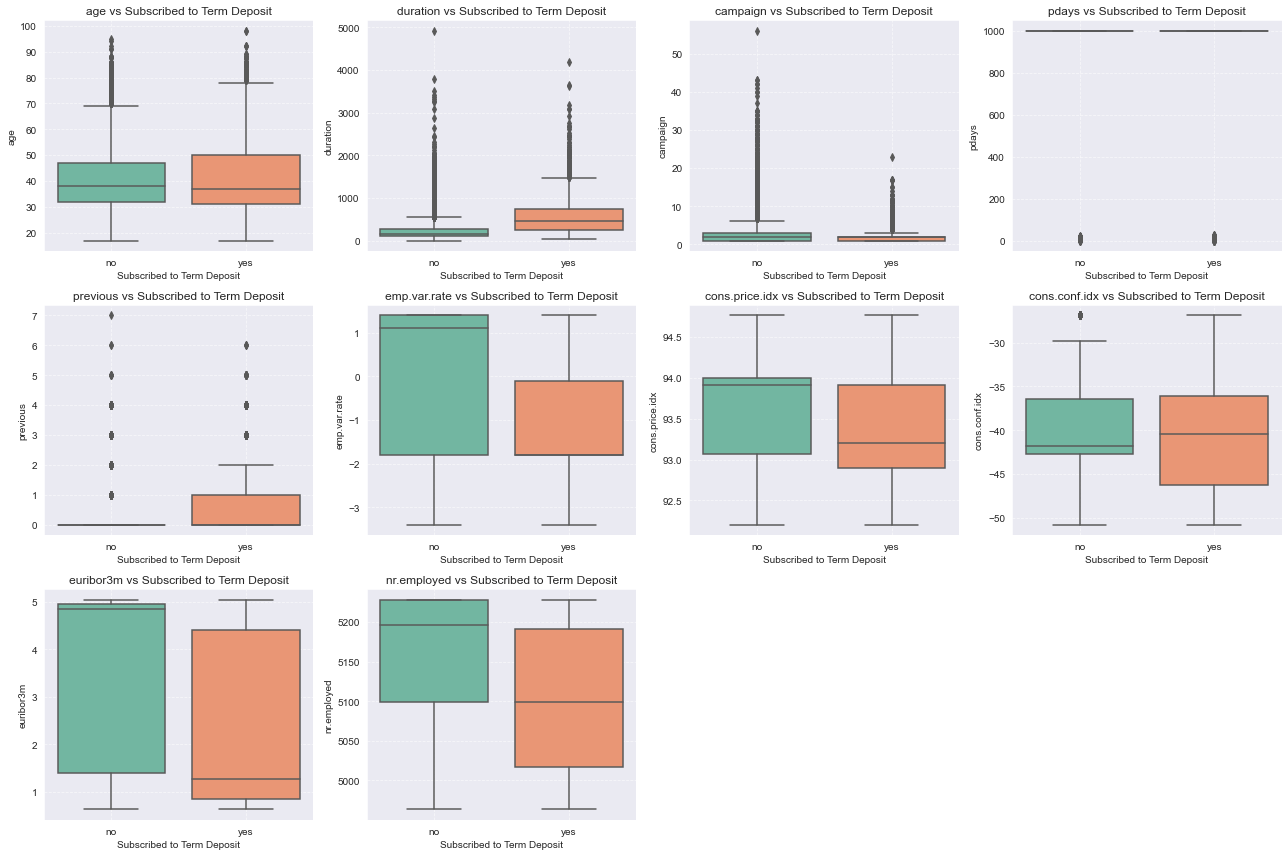

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size based on number of numerical columns
num_cols = len(numerical_cols)
rows = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)  # Dynamic row count for subplots

plt.figure(figsize=(18, rows * 4))

# Loop through numerical columns and plot boxplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 4, i)
    
    # Boxplot with color palette
    sns.boxplot(x='y', y=col, data=df, palette='Set2')
    
    # Add gridlines for better readability
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Set title and labels for each plot
    plt.title(f'{col} vs Subscribed to Term Deposit', fontsize=12)
    plt.xlabel('Subscribed to Term Deposit', fontsize=10)
    plt.ylabel(col, fontsize=10)

# Adjust layout to ensure plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()



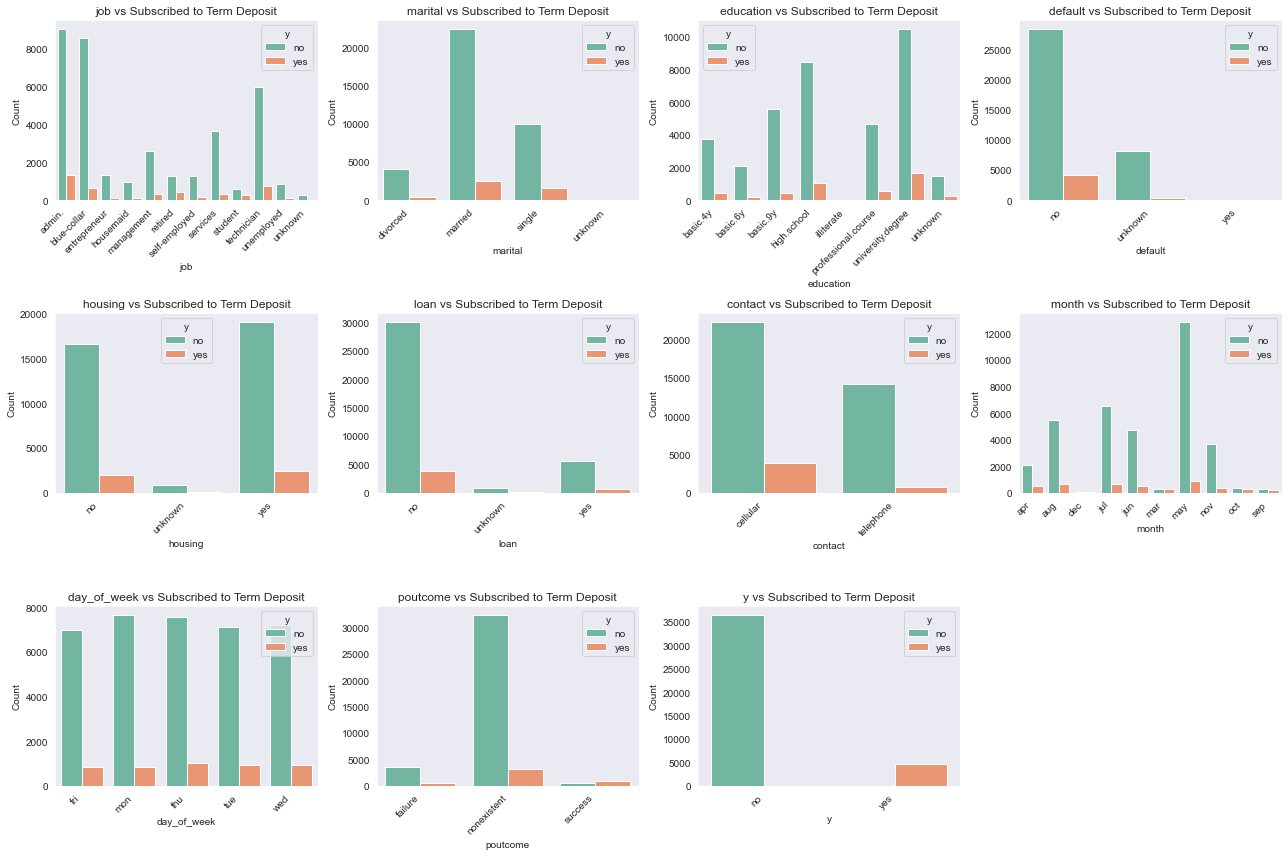

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size based on the number of categorical columns
num_cols = len(categorical_cols)
rows = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)  # Dynamic row count for subplots

plt.figure(figsize=(18, rows * 4))

# Loop through categorical columns and plot countplots
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 4, i)
    
    # Count plot with hue for the target variable
    ax = sns.countplot(x=col, hue='y', data=df, palette='Set2')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add title and labels
    plt.title(f'{col} vs Subscribed to Term Deposit', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    
        
# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

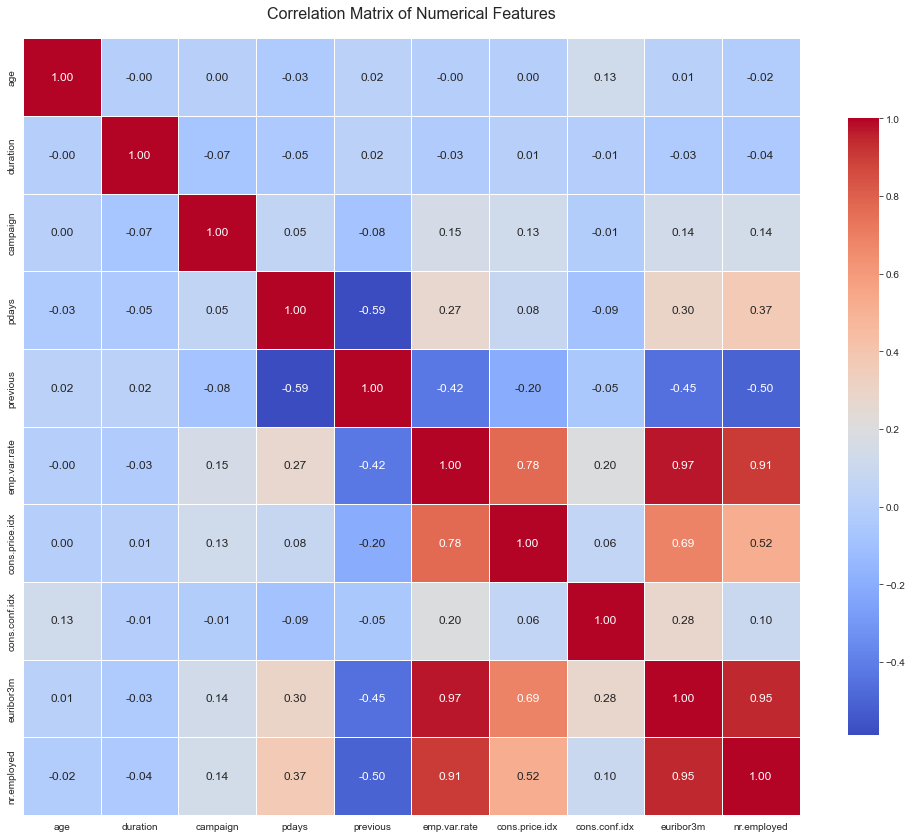

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr = df[numerical_cols].corr()

# Set up the figure size dynamically
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, 
            annot_kws={"size": 12})

# Add title and adjust its position
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()



## Feature Engineering

In [170]:
# Identify categorical and numerical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('y')  # Exclude target variable

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply Label Encoding to binary categorical variables
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Apply One-Hot Encoding to remaining categorical variables
multi_cols = [col for col in categorical_cols if df[col].nunique() > 2]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)


In [171]:
df_copy = df.copy()

In [172]:
# Create age bins
df['age_bin'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Check the new 'age_bin' column
print(df[['age', 'age_bin']].head())


   age age_bin
0   56   51-60
1   57   51-60
2   37   31-40
3   40   31-40
4   56   51-60


In [173]:
# Convert 'age_bin' to dummy variables
df = pd.get_dummies(df, columns=['age_bin'], drop_first=True)

# Verify the dummy variables creation
print(df.head())

   age  contact  duration  campaign  pdays  previous  emp.var.rate  \
0   56        1       261         1    999         0           1.1   
1   57        1       149         1    999         0           1.1   
2   37        1       226         1    999         0           1.1   
3   40        1       151         1    999         0           1.1   
4   56        1       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  day_of_week_mon  \
0          93.994          -36.4      4.857  ...                1   
1          93.994          -36.4      4.857  ...                1   
2          93.994          -36.4      4.857  ...                1   
3          93.994          -36.4      4.857  ...                1   
4          93.994          -36.4      4.857  ...                1   

  day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0               0                0                0                     1   
1         

In [174]:
df_copy = df.copy()

In [63]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [64]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Features to drop due to high correlation:", to_drop)

# Drop the features
df = df.drop(columns=to_drop)


Features to drop due to high correlation: ['euribor3m', 'nr.employed']


In [65]:
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Using mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'marital_married',
       'education_university.degree', 'default_unknown', 'housing_yes',
       'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age_bin_60+'],
      dtype='object')


#### Select the best features using randomforestclassifier

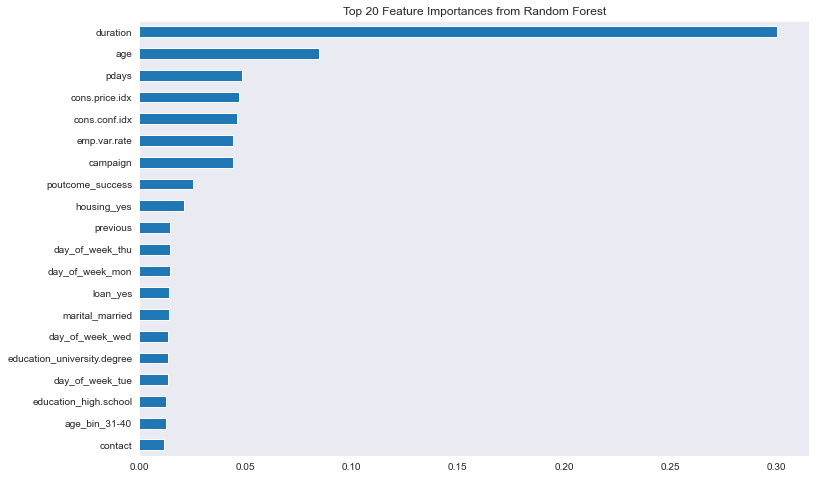

In [66]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
importances.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()


* Duration of the campaign seems to be one of the most important features
* We will consider the top 20 features as they importance reduces further after these features and this might not be helpful for us to build a model

In [67]:
# Select top 20 features
top_features = importances.head(20).index.tolist()
X = X[top_features]


0    36537
1     4639
Name: y, dtype: int64


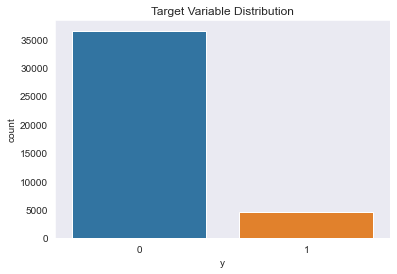

In [68]:
# Check target distribution
print(y.value_counts())
sns.countplot(x=y)
plt.title('Target Variable Distribution')
plt.show()


0    36537
1    36537
Name: y, dtype: int64


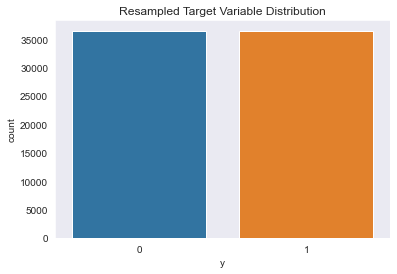

In [69]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check new distribution
print(pd.Series(y_res).value_counts())
sns.countplot(x=y_res)
plt.title('Resampled Target Variable Distribution')
plt.show()


Since the class was highly imbalaced, smote was used to balace the numeber of records for both the possible target values

## Train and Test

In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_res)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (58459, 20), (58459,)
Testing set: (14615, 20), (14615,)


7 models were tested to select the one that gives the best result


In [71]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'LightGBM' : lgb.LGBMClassifier(random_state=42),
    'XGBoost':xgb.XGBClassifier(random_state=42)
}


In [72]:
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.
Support Vector Machine trained.
[LightGBM] [Info] Number of positive: 29230, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1829
[LightGBM] [Info] Number of data points in the train set: 58459, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000034
[LightGBM] [Info] Start training from score 0.000034
LightGBM trained.
XGBoost trained.


In [73]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    
    return acc, prec, rec, f1, roc


In [74]:
# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

for name, model in trained_models.items():
    acc, prec, rec, f1, roc = evaluate_model(model, X_test, y_test)
    results = results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC AUC': roc
    }, ignore_index=True)

# Display the results
results = results.sort_values(by='ROC AUC', ascending=False)
results


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
2,Random Forest,0.948957,0.926538,0.975229,0.950260,0.990285
6,XGBoost,0.944099,0.931631,0.958533,0.944890,0.989826
5,LightGBM,0.940746,0.924141,0.960312,0.941879,0.988901
3,Gradient Boosting,0.913240,0.888360,0.945258,0.915926,0.974434
4,Support Vector Machine,0.901950,0.867769,0.948406,0.906297,0.953863
0,Logistic Regression,0.872118,0.868428,0.877104,0.872745,0.938715
1,Decision Tree,0.922614,0.912834,0.934446,0.923514,0.922615


In [76]:
best_model_name = results.iloc[0]['Model']
best_model = trained_models[best_model_name]
print(f"Best model: {best_model_name}")


Best model: Random Forest


#### Hyper parameter tuning

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'boosting_type': ['gbdt', 'dart']
}

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=lgb_param_grid, 
                                       n_iter=10, scoring='roc_auc', cv=3, verbose=1, random_state=42, n_jobs=-1)
lgb_random_search.fit(X_train, y_train)
print(f"Best LightGBM Parameters: {lgb_random_search.best_params_}")

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, 
                                       n_iter=10, scoring='roc_auc', cv=3, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
print(f"Best XGBoost Parameters: {xgb_random_search.best_params_}")



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 19486, number of negative: 19486
[LightGBM] [Info] Number of positive: 19486, number of negative: 19486
[LightGBM] [Info] Number of positive: 19487, number of negative: 19486
[LightGBM] [Info] Number of positive: 19487, number of negative: 19486
[LightGBM] [Info] Number of positive: 19487, number of negative: 19486
[LightGBM] [Info] Number of positive: 19486, number of negative: 19486
[LightGBM] [Info] Number of positive: 19487, number of negative: 19486
[LightGBM] [Info] Number of positive: 19487, number of negative: 19486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035230 seconds.
You can set `force_row_wise=true` to remo

In [78]:
# Evaluate the tuned LightGBM and XGBoost models
best_lgb_model = lgb_random_search.best_estimator_
best_xgb_model = xgb_random_search.best_estimator_

trained_models['Tuned LightGBM'] = best_lgb_model
trained_models['Tuned XGBoost'] = best_xgb_model

# Evaluate and append the results for tuned models
for name, model in trained_models.items():
    acc, prec, rec, f1, roc = evaluate_model(model, X_test, y_test)
    results = results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC AUC': roc
    }, ignore_index=True)

# Sort and display the final results
results = results.sort_values(by='ROC AUC', ascending=False)
print(results)


                     Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
14          Tuned LightGBM  0.952036   0.942169  0.963186  0.952561  0.992561
0            Random Forest  0.948957   0.926538  0.975229  0.950260  0.990285
9            Random Forest  0.948957   0.926538  0.975229  0.950260  0.990285
1                  XGBoost  0.944099   0.931631  0.958533  0.944890  0.989826
13                 XGBoost  0.944099   0.931631  0.958533  0.944890  0.989826
2                 LightGBM  0.940746   0.924141  0.960312  0.941879  0.988901
12                LightGBM  0.940746   0.924141  0.960312  0.941879  0.988901
15           Tuned XGBoost  0.936504   0.919837  0.956343  0.937735  0.987421
3        Gradient Boosting  0.913240   0.888360  0.945258  0.915926  0.974434
10       Gradient Boosting  0.913240   0.888360  0.945258  0.915926  0.974434
4   Support Vector Machine  0.901950   0.867769  0.948406  0.906297  0.953863
11  Support Vector Machine  0.901950   0.867769  0.948406  0.906

In [79]:
import joblib

# Save the best LightGBM model
joblib.dump(best_lgb_model, 'best_lightgbm_model.pkl')

['best_lightgbm_model.pkl']

In [93]:
# Make predictions using the trained LightGBM model
# Assuming X is your feature matrix
predictions = best_lgb_model.predict(X)

# If the output needs to be binary predictions (e.g., "yes" or "no"):
# Usually, LightGBM provides probabilities, so we can threshold it.
predicted_labels = ['yes' if pred >= 0.5 else 'no' for pred in predictions]

# Add the predictions as a new column to the original dataframe
df['prediction'] = predicted_labels
# Display the updated dataframe
print(df.head())

        age  contact  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533143        1  0.010352 -0.565963  0.195443 -0.349551      0.648101   
1  1.629107        1 -0.421577 -0.565963  0.195443 -0.349551      0.648101   
2 -0.290177        1 -0.124626 -0.565963  0.195443 -0.349551      0.648101   
3 -0.002284        1 -0.413864 -0.565963  0.195443 -0.349551      0.648101   
4  1.533143        1  0.187751 -0.565963  0.195443 -0.349551      0.648101   

   cons.price.idx  cons.conf.idx   y  ...  day_of_week_wed  \
0        0.722628       0.886568  no  ...                0   
1        0.722628       0.886568  no  ...                0   
2        0.722628       0.886568  no  ...                0   
3        0.722628       0.886568  no  ...                0   
4        0.722628       0.886568  no  ...                0   

   poutcome_nonexistent  poutcome_success  age_bin_31-40  age_bin_41-50  \
0                     1                 0              0              0   
1       

## ROI Calculation

In [145]:
# Define constants for revenue and cost
REVENUE_PER_SUBSCRIPTION = 1000  # Bank earns $1000 for every successful subscription
COST_PER_CONTACT = 50  # The cost of contacting a customer per interaction

# Step 1: Calculate total cost of the campaign per customer
df_copy['total_cost'] = df_copy['campaign'] * COST_PER_CONTACT

# Step 2: Calculate revenue per customer (only if the customer actually subscribed)
df_copy['revenue'] = df_copy['y'].apply(lambda x: REVENUE_PER_SUBSCRIPTION if x == 'yes' else 0)

# Step 3: Ensure 'total_cost' and 'revenue' are numeric
df_copy['total_cost'] = pd.to_numeric(df_copy['total_cost'], errors='coerce')
df_copy['revenue'] = pd.to_numeric(df_copy['revenue'], errors='coerce')

# Step 4: Calculate overall ROI for Scenario 1 (Actual Outcomes)
df_copy['roi'] = ((df_copy['revenue'] - df_copy['total_cost']) / df_copy['total_cost']) * 100

# Step 5: Display the first few rows to verify the ROI calculation
df_copy[['campaign', 'total_cost', 'revenue', 'roi']].head()


,campaign,total_cost,revenue,roi
0,1,50,0,-100.0
1,1,50,0,-100.0
2,1,50,0,-100.0
3,1,50,0,-100.0
4,1,50,0,-100.0


In [175]:
# Define constants for revenue and cost
REVENUE_PER_SUBSCRIPTION = 1000  # Bank earns $1000 for every successful subscription
COST_PER_CONTACT = 50  # The cost of contacting a customer per interaction

df_copy['age_bin_31-40'] = df['age_bin_31-40']
# Prepare the features that were used to train the model
X_features = df_copy[["duration", "age", "pdays", "cons.price.idx", "cons.conf.idx", 
                 "emp.var.rate", "campaign", "poutcome_success", "housing_yes", 
                 "previous", "day_of_week_thu", "day_of_week_mon", "loan_yes", 
                 "marital_married", "day_of_week_wed", "education_university.degree", 
                 "day_of_week_tue", "education_high.school", "age_bin_31-40", "contact"]]

# Step 1: Predict the outcomes using the model
df_copy['prediction'] = best_lgb_model.predict(X_features)

# Step 2: Calculate cost only for incorrect predictions (where prediction != actual)
df_copy['total_cost_model'] = df_copy.apply(
    lambda row: COST_PER_CONTACT * row['campaign'] if row['prediction'] != (1 if row['y'] == 'yes' else 0) else 0,
    axis=1
)

# Step 3: Calculate revenue only for correct predictions of 'yes'
df_copy['revenue_model'] = df_copy.apply(
    lambda row: REVENUE_PER_SUBSCRIPTION if row['prediction'] == 1 and row['y'] == 'yes' else 0,
    axis=1
)

# Step 4: Ensure 'total_cost_model' and 'revenue_model' are numeric
df_copy['total_cost_model'] = pd.to_numeric(df_copy['total_cost_model'], errors='coerce')
df_copy['revenue_model'] = pd.to_numeric(df_copy['revenue_model'], errors='coerce')

# Step 5: Calculate ROI for Scenario 2 (Model Predictions)
df_copy['roi_model'] = ((df_copy['revenue_model'] - df_copy['total_cost_model']) / df_copy['total_cost_model']) * 100

# Step 6: Display the first few rows to verify the ROI calculation
df_copy[['campaign', 'total_cost_model', 'revenue_model', 'roi_model']].head()


,campaign,total_cost_model,revenue_model,roi_model
0,1,50,0,-100.0
1,1,50,0,-100.0
2,1,50,0,-100.0
3,1,50,0,-100.0
4,1,50,0,-100.0


#### Summary

* It was seen that using the model there was a 70% increase in the ROI since the previously the ad campaign was sent out to everyone and the bank incurred a loss when someone did not sign up
* But when used along with the model the only time the bank incurrs a loss is whe the model predicts the outcome incorrectly and the bank sends out an ad campaign. But since the model is 95% accurate, this solution is the most feasable one